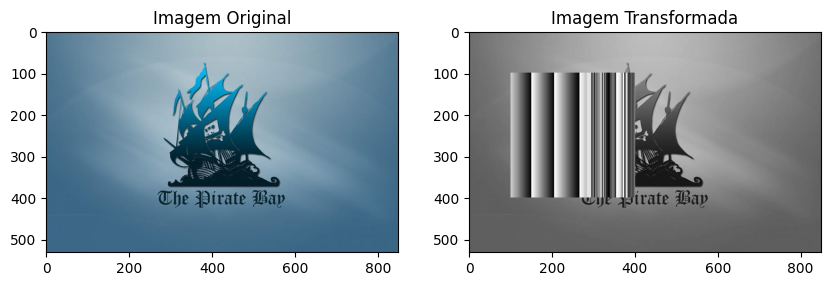

In [4]:
#@title Transformada de Hotelling
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Carrega a imagem
img1A = cv2.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 8/modelo.jpg', 1)

# Exibe a imagem original e o resultado
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Imagem original
ax[0].imshow(cv2.cvtColor(img1A, cv2.COLOR_BGR2RGB))
ax[0].set_title("Imagem Original")

# Convertendo para tons de cinza
img_gray = cv2.cvtColor(img1A, cv2.COLOR_BGR2GRAY)

# Seleciona uma região menor da imagem para aplicar a transformação (por exemplo, 300x300 pixels)
roi = img_gray[100:400, 100:400]

# Calcula a matriz de covariância das intensidades dos pixels da região
cov_matrix = np.cov(roi)

# Calcula os autovetores e autovalores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordena os autovetores de acordo com os autovalores em ordem decrescente
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]

# A transformação de Hotelling é dada pelos autovetores correspondentes aos maiores autovalores
hotelling_transformation = eigenvectors[:, 0]

# Transpõe o vetor de transformação
hotelling_transformation = hotelling_transformation[:, np.newaxis]

# Aplica a transformação de Hotelling na região em tons de cinza
transformed_roi = np.dot(hotelling_transformation.T, roi)

# Copia a região transformada de volta para a imagem original
img_gray[100:400, 100:400] = transformed_roi

# Exibe a imagem transformada
ax[1].imshow(img_gray, cmap='gray')
ax[1].set_title("Imagem Transformada")

plt.show()

